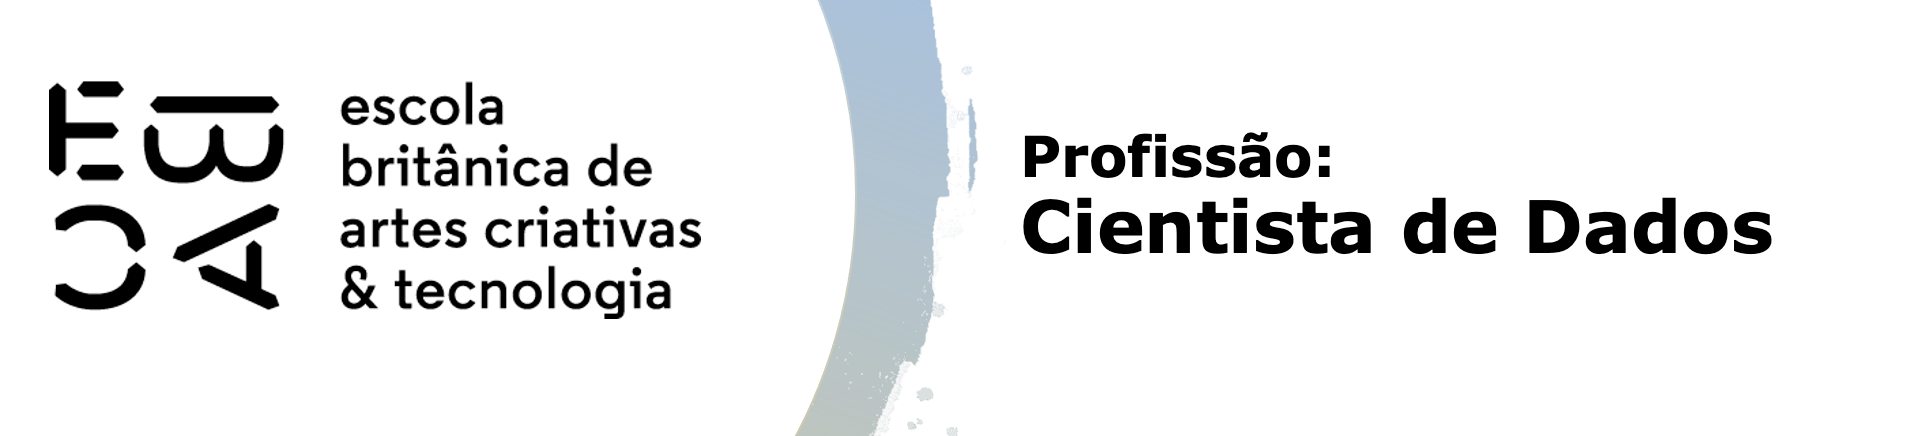

# Probabilidade - Tarefa

In [6]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

In [3]:
media = 15
desvio_padrao = 0.1
peso_minimo = 15.2

z = (peso_minimo - media) / desvio_padrao # z-score
probabilidade = 1 - stats.norm.cdf(z)

print(f"A probabilidade de um pacote pesar mais que 15,2 kg é {probabilidade:.3f}.")

A probabilidade de um pacote pesar mais que 15,2 kg é 0.023.


2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

In [37]:
percentil_95 = stats.norm.ppf(0.95, loc=media, scale=desvio_padrao)

print(f"O percentil de ordem 95% para o peso dos pacotes é {percentil_95:.3f} kg.")

O percentil de ordem 95% para o peso dos pacotes é 15.164 kg.


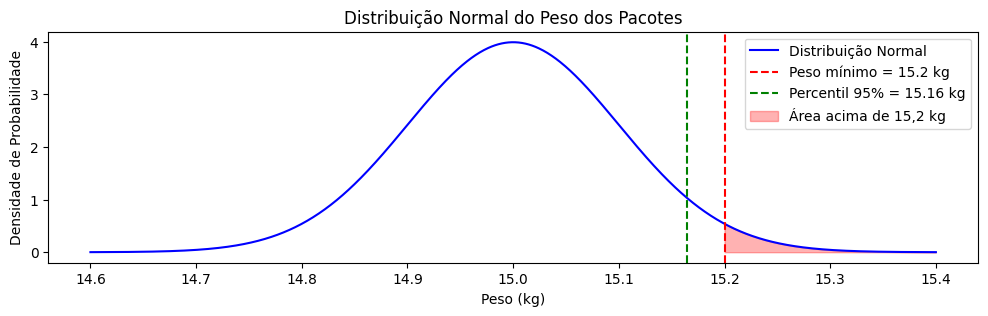

In [14]:
# Visualizando com um gráfico
x = np.linspace(media - 4 * desvio_padrao, media + 4 * desvio_padrao, 1000)
y = stats.norm.pdf(x, loc = media, scale = desvio_padrao)

plt.figure(figsize=(12, 3))
plt.plot(x, y, label='Distribuição Normal', color='blue')

# peso mínimo e o percentil de 95%
plt.axvline(peso_minimo, color='red', linestyle='--', label = (f'Peso mínimo = {peso_minimo} kg'))
plt.axvline(percentil_95, color='green', linestyle='--', label = (f'Percentil 95% = {percentil_95:.2f} kg'))

# área acima de 15,2 kg
x_fill = np.linspace(peso_minimo, media + 4 * desvio_padrao, 500)
y_fill = stats.norm.pdf(x_fill, loc=media, scale=desvio_padrao)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label='Área acima de 15,2 kg')

plt.title('Distribuição Normal do Peso dos Pacotes')
plt.xlabel('Peso (kg)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

In [33]:
Y=np.linspace(-6, 6, 200)
# Seu código começa aqui

# distribuição Normal padrão
prob_y1 = stats.norm.cdf(Y) # segundo a documentação loc=0, scale=1 são parâmetros default

# distribuição t-Student
prob_y2 = stats.t.cdf(Y, df = 5)

In [65]:
prob_y1[0:10]

array([9.86587645e-10, 1.42773376e-09, 2.05881881e-09, 2.95834659e-09,
       4.23585138e-09, 6.04357383e-09, 8.59229446e-09, 1.21727145e-08,
       1.71842058e-08, 2.41733058e-08])

In [66]:
prob_y2[0:10]

array([0.00092307, 0.00096571, 0.00101068, 0.00105814, 0.00110824,
       0.00116116, 0.00121706, 0.00127615, 0.00133864, 0.00140476])

4. Faça uma visualização gráfica dos dados do item anterior.

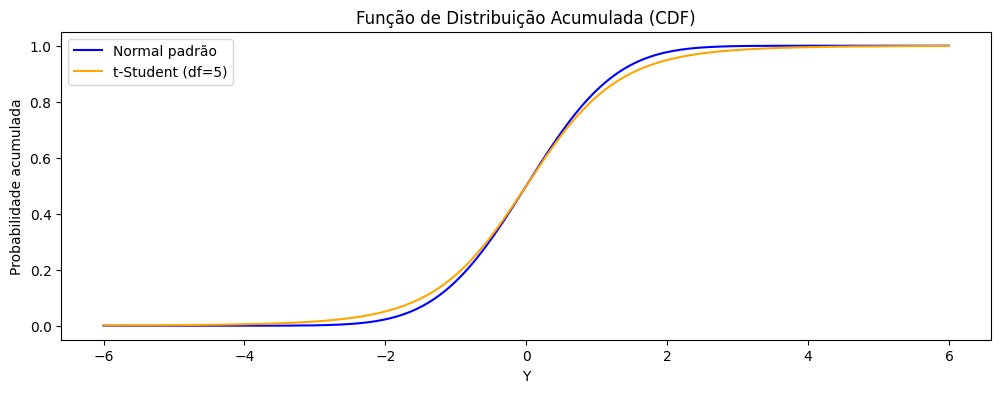

In [61]:
plt.figure(figsize=(12, 4))

plt.plot(Y, prob_y1, label='Normal padrão', color='blue')
plt.plot(Y, prob_y2, label='t-Student (df=5)', color='orange')
plt.title('Função de Distribuição Acumulada (CDF)')
plt.xlabel('Y')
plt.ylabel('Probabilidade acumulada')
plt.legend()
plt.show()

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

In [48]:
P=np.linspace(0, 1, 20)
# Seu código começa aqui
percentis_y1 = stats.norm.ppf(P)
percentis_y2 = stats.t.ppf(P, df=5)

In [68]:
P

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [69]:
percentis_y1

array([       -inf, -1.61985626, -1.25211952, -1.00314797, -0.80459638,
       -0.63364   , -0.47950565, -0.33603814, -0.19920132, -0.06601181,
        0.06601181,  0.19920132,  0.33603814,  0.47950565,  0.63364   ,
        0.80459638,  1.00314797,  1.25211952,  1.61985626,         inf])

In [70]:
percentis_y2

array([       -inf, -1.97489346, -1.4358593 , -1.11439619, -0.87612441,
       -0.68067217, -0.51027663, -0.35532778, -0.20979907, -0.06939058,
        0.06939058,  0.20979907,  0.35532778,  0.51027663,  0.68067217,
        0.87612441,  1.11439619,  1.4358593 ,  1.97489346,         inf])

6. Faça um gráfico com os dados do item anterior.

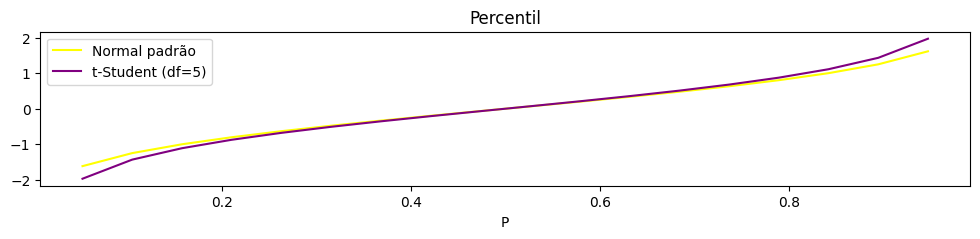

In [60]:
plt.figure(figsize=(12, 2))

plt.plot(P, percentis_y1, label='Normal padrão', color='yellow')
plt.plot(P, percentis_y2, label='t-Student (df=5)', color='purple')
plt.title('Percentil')
plt.xlabel('P')
plt.legend()
plt.show()